In [1]:
# Step 1: Importing the Relevant Libraries
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [114]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

sns.set()
%matplotlib inline

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
# Step 2. Data Inspection

In [6]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [7]:
test.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [8]:
test.isnull().sum()/test.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [9]:
train.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
train.isnull().sum()/train.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 5


In [13]:
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 4


In [14]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [16]:
# Step 3. Data Cleaning

In [17]:
# 1) Item Size

In [18]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [19]:
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(1463, 976)

<Axes: xlabel='Item_Weight'>

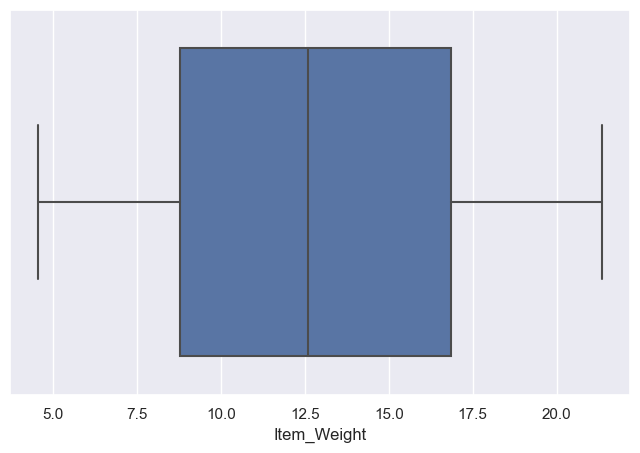

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=train)

<Axes: xlabel='Item_Weight'>

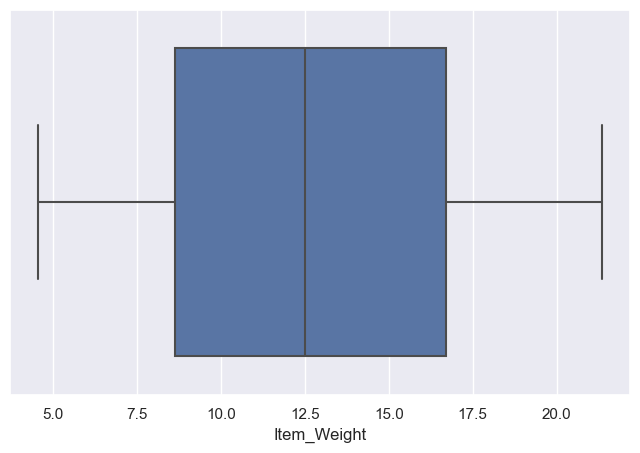

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=test)

In [22]:
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [23]:
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(0, 0)

In [24]:
# 2) Outlet Size

In [25]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(2410, 1606)

In [26]:
print(train['Outlet_Size'].value_counts())
print('******************************************')
print(test['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
******************************************
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


In [27]:
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [28]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(0, 0)

In [29]:
# Step 4. Exploratory Data Analysis

In [30]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [31]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [32]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [33]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [34]:
train['Item_Fat_Content']= train['Item_Fat_Content'].astype(str)

In [35]:
train['Years_Established'] = train['Outlet_Establishment_Year'].apply(lambda x: 2020 - x) 
test['Years_Established'] = test['Outlet_Establishment_Year'].apply(lambda x: 2020 - x)

In [36]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [37]:
# Step 4.A. Univariate Analysis

In [38]:
# 1) Item Fat Content¶

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

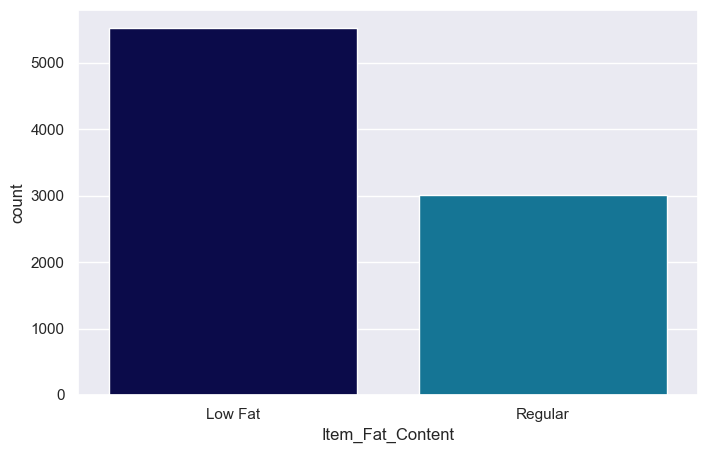

In [39]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=train,palette='ocean')

In [41]:
# Observations:
# The Items bought are more of Low Fat.

In [42]:
# 2) Item Type

<Axes: xlabel='Item_Type', ylabel='count'>

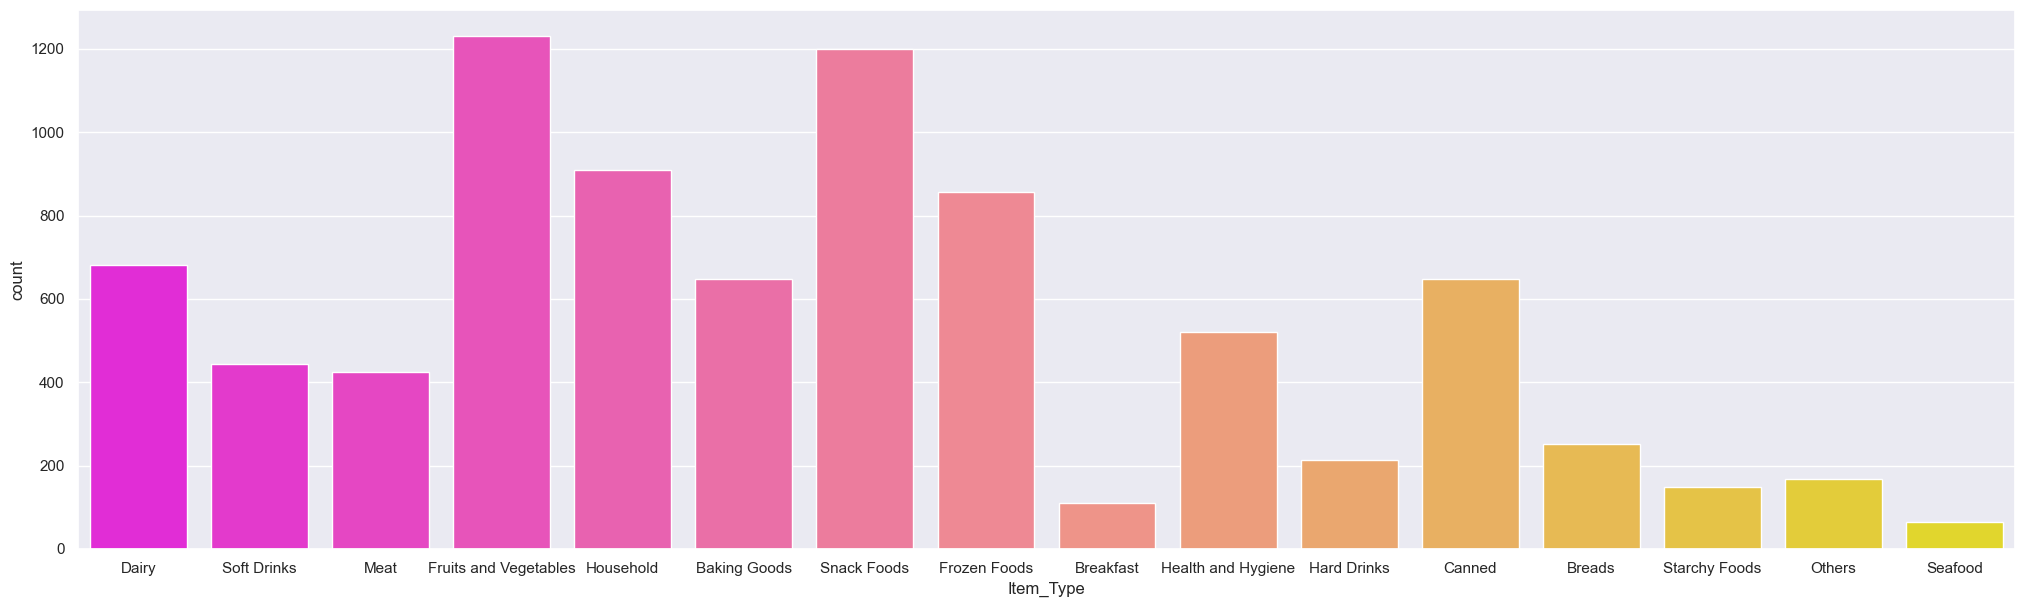

In [43]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=train,palette='spring')

In [44]:
# Observations:
# Fruits and Vegetables are largely sold as people tend to use them on daily purpose.
# Snack Foods too have good sales.

In [45]:
# 3) Outlet Size

<Axes: xlabel='Outlet_Size', ylabel='count'>

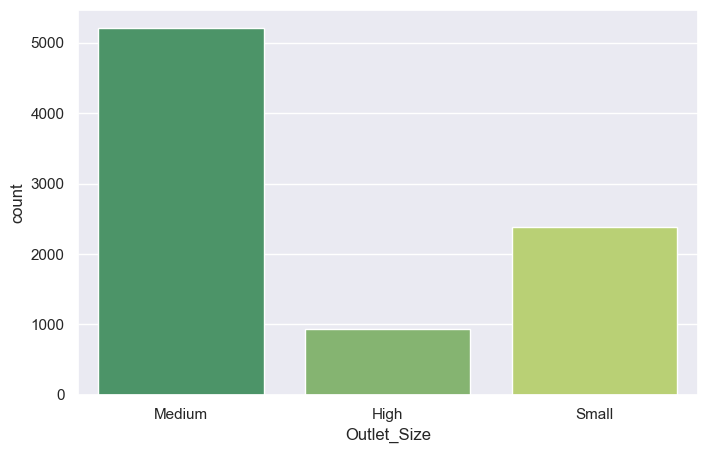

In [46]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=train,palette='summer')

In [47]:
# Observations:
# The Outlets are more of Medium Size

In [48]:
# 4) Outlet Location Type

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

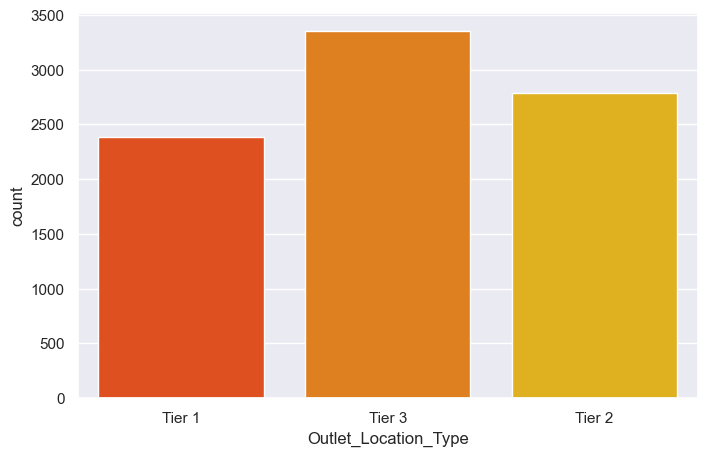

In [49]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=train,palette='autumn')

In [50]:
# Observations:
# The Outlets are maximum in number in Tier 3 Cities.

In [51]:
# 5) Outlet Type

<Axes: xlabel='Outlet_Type', ylabel='count'>

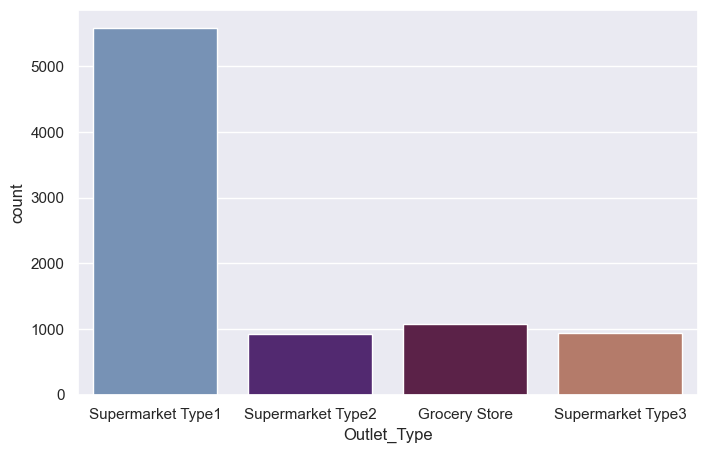

In [52]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=train,palette='twilight')

In [53]:
# Observations:
# The Outlets are more of Supermarket Type1.

<Axes: xlabel='Years_Established', ylabel='count'>

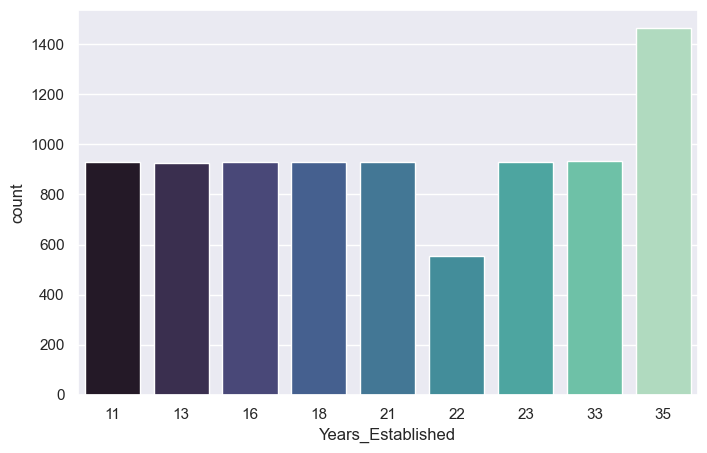

In [54]:
plt.figure(figsize=(8,5))
sns.countplot('Years_Established',data=train,palette='mako')

In [55]:
# Observations:
# The Outlets are more of established and running from 35 years.

In [56]:
# Step 4.B Bivariate Analysis

In [57]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Years_Established'],
      dtype='object')

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

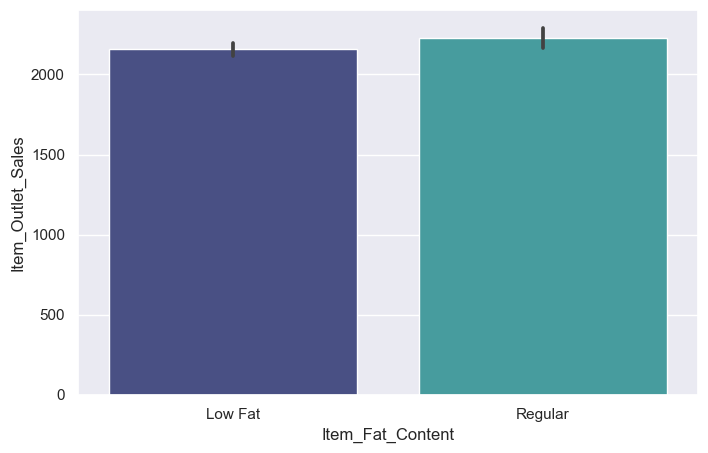

In [58]:
# 1) Item Fat Content
plt.figure(figsize=(8,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=train,palette='mako')

In [59]:
# Observations:
# The Item Outles sales are high for both Low Fat and Regular Item types.

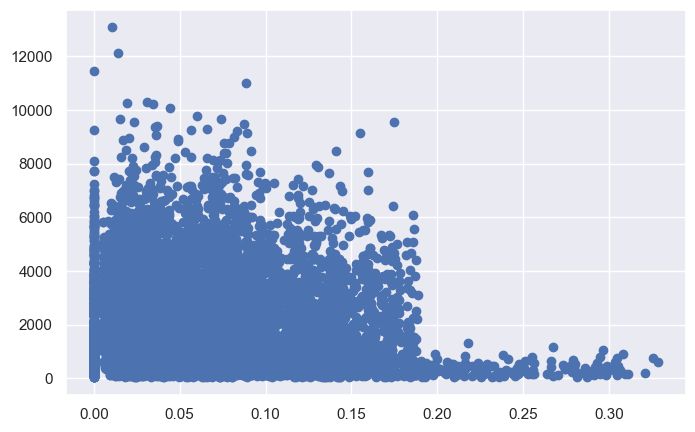

In [60]:
# 2) Item Visibility
plt.figure(figsize=(8,5))
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=train)

In [61]:
# Observations:
# Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

In [62]:
train['Item_Visibility']=train['Item_Visibility'].replace(0,train['Item_Visibility'].mean())
test['Item_Visibility']=test['Item_Visibility'].replace(0,test['Item_Visibility'].mean())

Text(0, 0.5, 'Item Visibility')

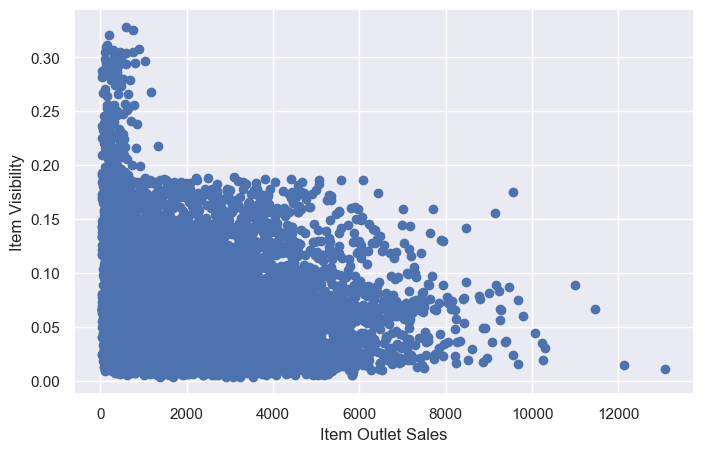

In [63]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Visibility',x='Item_Outlet_Sales',data=train)
plt.xlabel('Item Outlet Sales')
plt.ylabel('Item Visibility')

<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

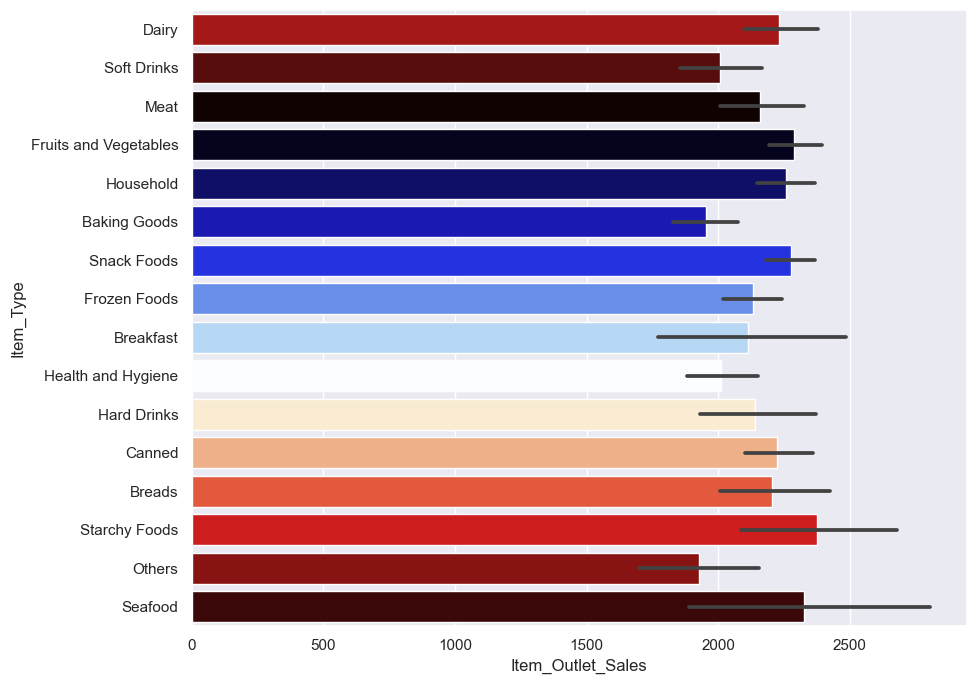

In [64]:
# 3) Item Type
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train,palette='flag')

In [65]:
# Observations:
# The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

Text(0, 0.5, 'Item Outlet Sales')

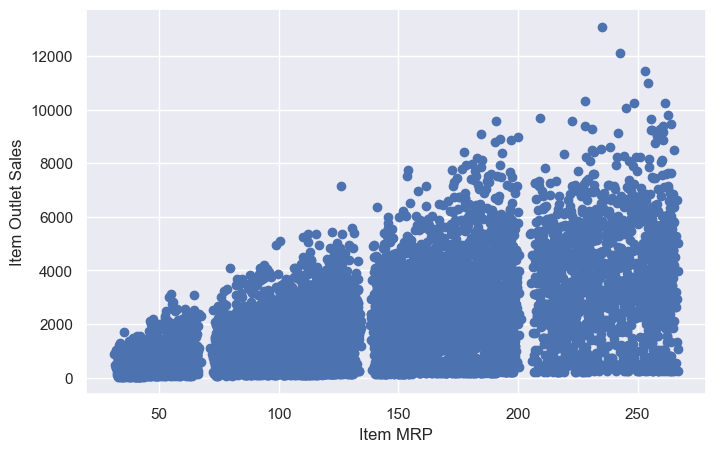

In [66]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=train)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

In [67]:
# Observations:
# Items MRP ranging from 200-250 dollars is having high Sales.

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

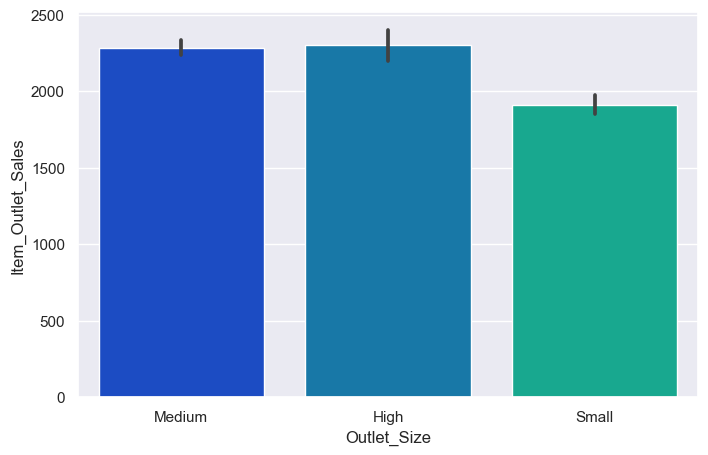

In [68]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train,palette='winter')

In [69]:
# Observations:
# The Outlet Sales is maximum for Medium and High sized Outlets.
# The Outlets we have is Medium and may be with High size Outlets can improve the Outlet Sales.

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

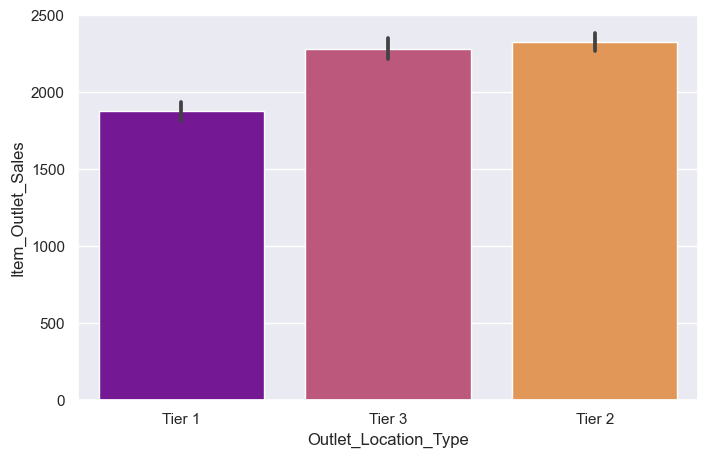

In [70]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train,palette='plasma')

In [71]:
# Observations:
# The Outlet Sales tend to be high for Tier3 and Tier 2 location types but we have only Tier3 locations maximum Outlets.

<Axes: xlabel='Years_Established', ylabel='Item_Outlet_Sales'>

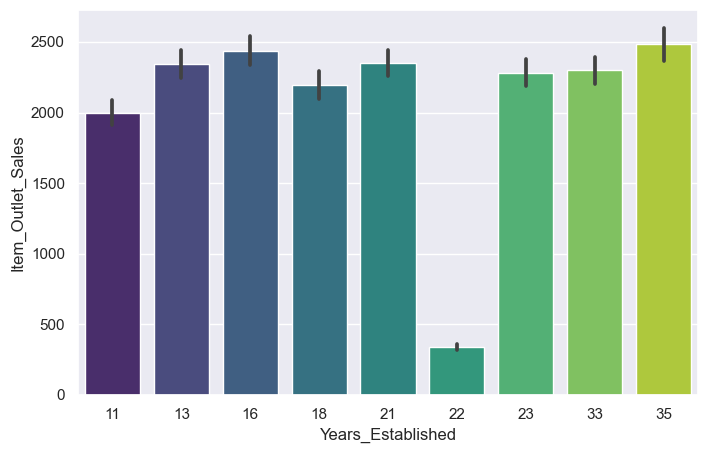

In [72]:
plt.figure(figsize=(8,5))
sns.barplot(x='Years_Established',y='Item_Outlet_Sales',data=train,palette='viridis')

In [73]:
# Observations:
# It is quiet evident that Outlets established 35 years before is having good Sales margin.
# We also have a outlet which was established before 22 years has the lowest sales margin, so established years wouldn't improve the Sales unless the products are sold according to customer's interest.

In [74]:
# Step 4.C Multivariate Analysis

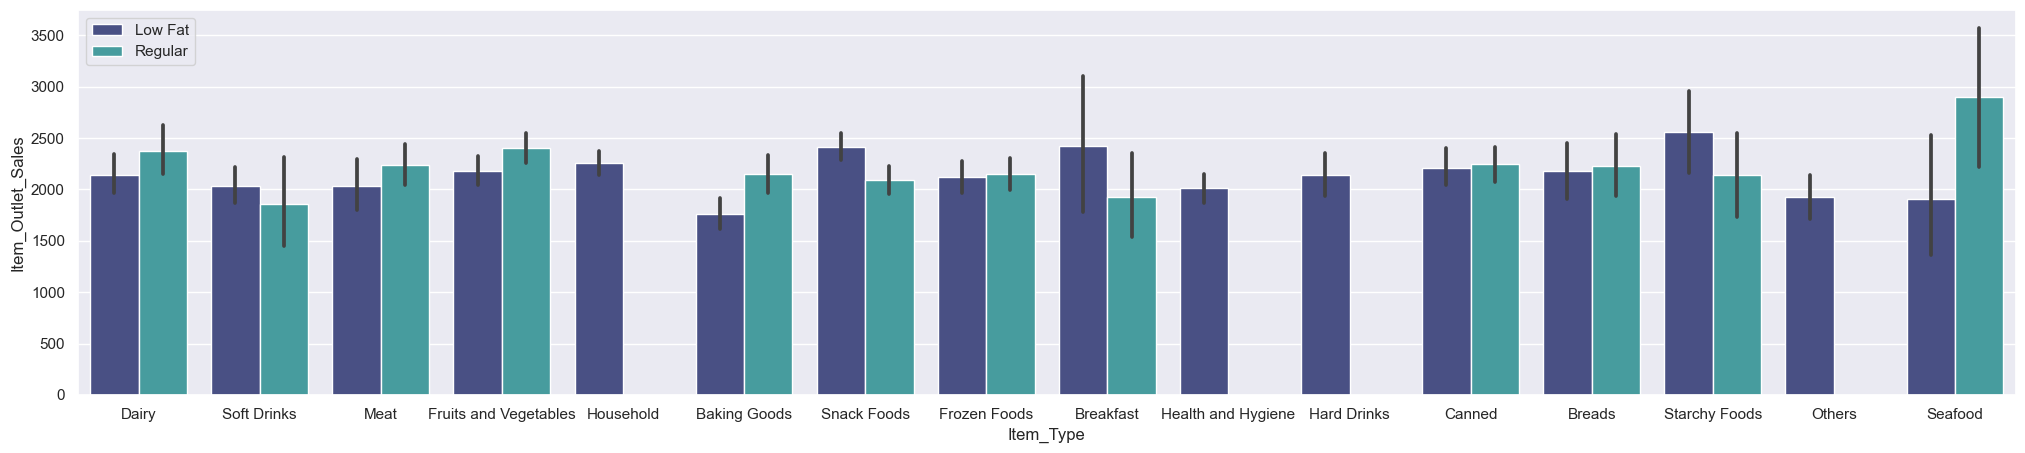

In [75]:
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=train,palette='mako')
plt.legend()

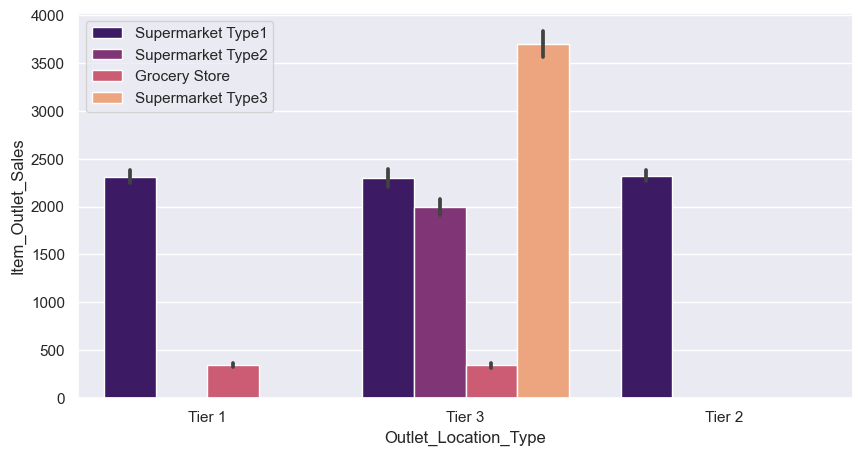

In [76]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=train,palette='magma')
plt.legend()

In [78]:
# Observations:
# The Tier-3 location type has all types of Outlet type and has high sales margin.

In [79]:
# Step 5. Feature Engineering

In [80]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [81]:
le = LabelEncoder()
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']

for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [82]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,21
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,11
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,21
3,FDX07,19.20,1,0.066132,6,182.0950,OUT010,1998,1,2,0,732.3800,22
4,NCD19,8.93,0,0.066132,9,53.8614,OUT013,1987,0,2,1,994.7052,33


In [83]:
train = train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
test= test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [84]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Years_Established'],
      dtype='object')

In [85]:
X= train[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Years_Established']]
y= train['Item_Outlet_Sales']

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)


In [87]:
# Step 6. Feature Scaling

In [88]:
features= ['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Years_Established']

In [89]:
# Step 7. Building Model

In [90]:
# 1) Linear regression

In [91]:
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
coef2 = pd.Series(LR.coef_,features).sort_values()

In [92]:
coef2

Item_Visibility        -1709.417280
Outlet_Location_Type    -434.605812
Outlet_Size             -339.441273
Years_Established         -1.425485
Item_Weight                0.002459
Item_Type                  1.696998
Item_MRP                  15.616646
Item_Fat_Content          35.759818
Outlet_Type             1007.739359
dtype: float64

<Axes: >

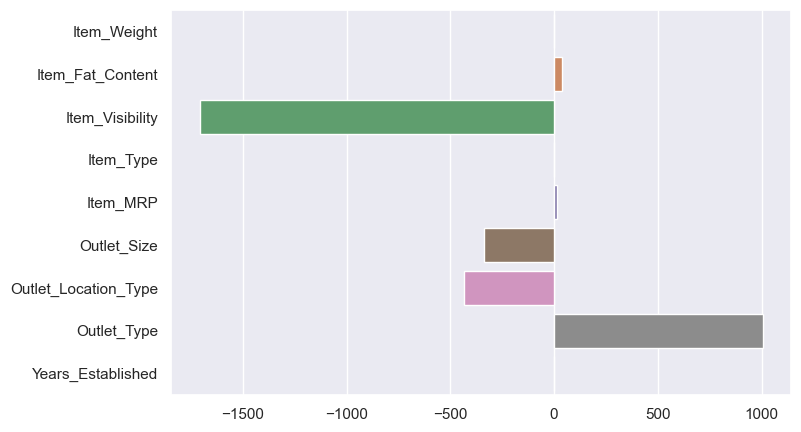

In [93]:
plt.figure(figsize=(8,5))
sns.barplot(LR.coef_,features)

In [94]:
# Step 8. Evaluation Metrics

In [95]:
# a) R-Squared:

In [103]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
R2

0.4946245671867818

In [97]:
# b) MAE and MSE:

In [98]:
MAE= metrics.mean_absolute_error(y_test,y_pred)
MSE= metrics.mean_squared_error(y_test,y_pred)

In [99]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 933.3418289826433
mean squared error: 1561773.7754033809


In [100]:
# c) RMSE:

In [101]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1249.7094763997675


In [111]:
# 2) Random Forest

In [104]:
RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)

# Fitting the model on our trained dataset.
RF.fit(X_train,y_train)

# Making Predictions
y_pred = RF.predict(X_test)

In [105]:
coef3 = pd.Series(RF.feature_importances_, features).sort_values(ascending=False)
coef3

Item_MRP                0.543879
Outlet_Type             0.397488
Years_Established       0.057754
Item_Weight             0.000267
Outlet_Location_Type    0.000265
Item_Visibility         0.000248
Item_Type               0.000078
Outlet_Size             0.000021
Item_Fat_Content        0.000000
dtype: float64

<Axes: >

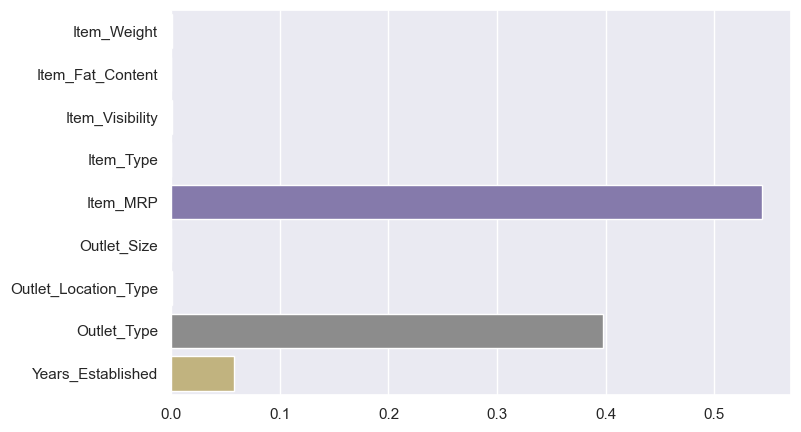

In [106]:
plt.figure(figsize=(8,5))
sns.barplot(RF.feature_importances_,features)

In [107]:
def cross_val(model_name,model,X,y,cv):
    
    scores = cross_val_score(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),2)}')

In [108]:
cross_val(LR,LinearRegression(),X,y,5)

LinearRegression(normalize=True) Scores:
0.53
0.5
0.49
0.51
0.51
Average LinearRegression(normalize=True) score: 0.51


In [109]:
cross_val(RF,RandomForestRegressor(),X,y,5)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) Scores:
0.56
0.53
0.52
0.55
0.56
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) score: 0.55


In [110]:
# Random forest Model clearly did best!

In [142]:
# 3) XGBoost

In [124]:
#importing libraries
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import sys
!{sys.executable} -m pip install xgboost

In [125]:
X, y = train.iloc[:,:-1],train.iloc[:,-1]

In [126]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,1,0,1,2097.2700
3,19.200,1,0.066132,6,182.0950,1,2,0,732.3800
4,8.930,0,0.066132,9,53.8614,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,1,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,1,2,2,1845.5976


In [127]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [129]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [130]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [131]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 9.299772


In [136]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)


In [137]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.083735,0.046141,21.083956,0.114278
1,19.207656,0.049962,19.223425,0.169140
2,17.430968,0.107631,17.423252,0.111513
3,15.862916,0.135280,15.843183,0.065799
4,14.480145,0.100882,14.484103,0.103759


In [138]:
print((cv_results["test-rmse-mean"]).tail(1))

49    2.043149
Name: test-rmse-mean, dtype: float64


In [139]:
# Visualize Boosting Trees and Feature Importance

In [140]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

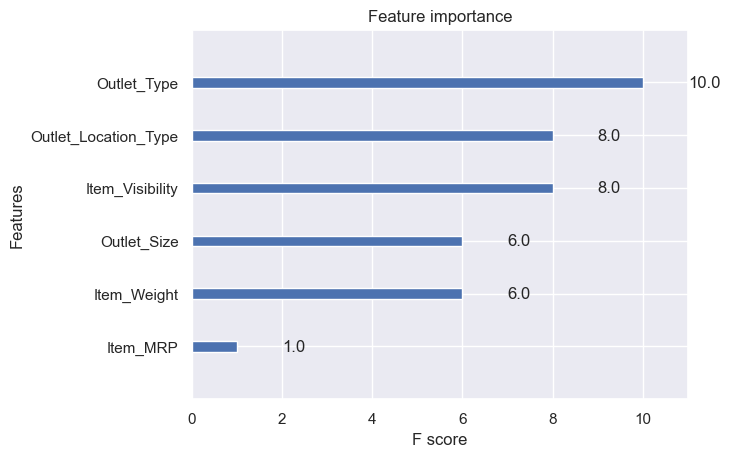

In [141]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [8, 6]
plt.show()

In [143]:
# 4)Regularized Linear Regression

In [144]:
# 1. LASSO Regression:

In [147]:
#Importing LASSO AND RIDGE from sklearn library:
#Apply Lasso Regularization Technique
from sklearn.linear_model import Lasso, Ridge
ls = Lasso(alpha = 0.009)
ls.fit(X_train, y_train)

Lasso(alpha=0.009)

In [149]:
#prediction by LASSO model
ls_pred = ls.predict(X_test)

In [150]:
#Accuracy After Lasso(by R2_score)
r2_score(y_test,ls_pred)

0.06487246653268208

In [151]:
#Root Mean Square Error
rmse_lasso = sqrt(mean_squared_error(y_test, ls_pred))
rmse_lasso

8.129343647784966

In [153]:
#Getting Lasso Coefficent
lasso_coeff = pd.Series(ls.coef_, index =X.columns) 

<Axes: >

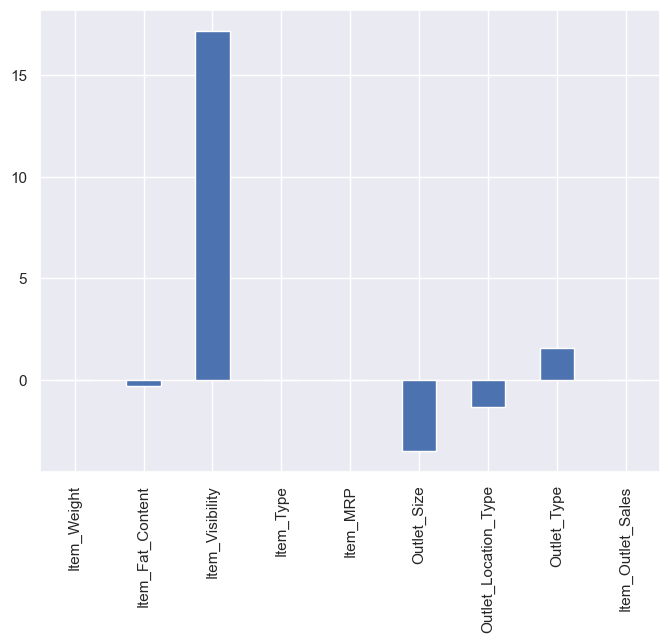

In [154]:
#Visualization of Coefficent after LASSO 
lasso_coeff.plot(kind = "bar")

In [155]:
#RESHAPING THE PREDICTED VALUES
ls_pred= ls_pred.reshape(-1,1)

ls_pred


array([[17.75139878],
       [19.19965103],
       [23.50418156],
       ...,
       [19.17028471],
       [19.63753351],
       [24.13886839]])

In [158]:
# 2. RIDGE Regression:

In [160]:
#Ridge Regression
rr = Ridge(alpha = 0.009)
rr.fit(X_train, y_train)

Ridge(alpha=0.009)

In [162]:
#Prediction AFTER Ridge regression
rr_pred = rr.predict(X_test)

In [163]:
#Accuracy score check
r2_score(y_test, y_pred)

-92835.62573002423

In [164]:
#RMSE
rmse_ridge = sqrt(mean_squared_error(y_test, rr_pred))
rmse_ridge

8.130610101368099

In [165]:
#residue after ridge
residue_rr = y_test-rr_pred

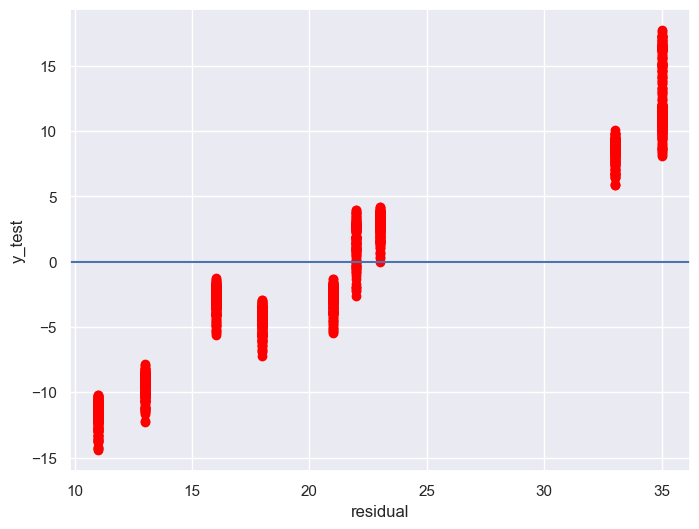

In [166]:
#plotting of residual graph after RIDGE REGRESSION
plt.scatter(y_test,residue_rr, c = "red")
plt.xlabel("residual")
plt.ylabel("y_test")
plt.axhline(y = 0)